## IMPORT LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

# IMPORTING CROP YIELD DATA SET

In [4]:
#Import Crop yield dataset.
yield_df = pd.read_csv('C:/Users/adebi/Downloads/ICA DATA/yield.csv')

#Overview of number of rows and columns
yield_df.shape

(56717, 12)

In [5]:
#Print first few rows of the data
yield_df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [6]:
#Rename 'Value' column to 'Cropyield'
yield_df = yield_df.rename(index=str, columns={'Value': 'Cropyield'})
yield_df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Cropyield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [7]:
#selecting relevant columns.
yield_df = yield_df[['Area', 'Item', 'Year', 'Cropyield']]
yield_df.head()

,Area,Item,Year,Cropyield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [8]:
#Print last few rows of the yield dataset
yield_df.tail()

,Area,Item,Year,Cropyield
56712,Zimbabwe,Wheat,2012,24420
56713,Zimbabwe,Wheat,2013,22888
56714,Zimbabwe,Wheat,2014,21357
56715,Zimbabwe,Wheat,2015,19826
56716,Zimbabwe,Wheat,2016,18294


In [9]:
#Overview of the yield dataset
yield_df.describe()

,Year,Cropyield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


In [10]:
#Overview of the Data types within the yield dataset
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       56717 non-null  object
 1   Item       56717 non-null  object
 2   Year       56717 non-null  int64 
 3   Cropyield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [11]:
#Crops within in the yield dataset known as "Item"
Item = yield_df.Item.value_counts()
print(Item)

Maize                   8631
Potatoes                7876
Rice, paddy             6469
Sweet potatoes          6356
Wheat                   6160
Cassava                 5718
Sorghum                 5511
Soybeans                4192
Yams                    3150
Plantains and others    2654
Name: Item, dtype: int64


In [12]:
#Sum of Items
Total_Item = Item.sum()
print('Total number of crops: ', Total_Item)

Total number of crops:  56717


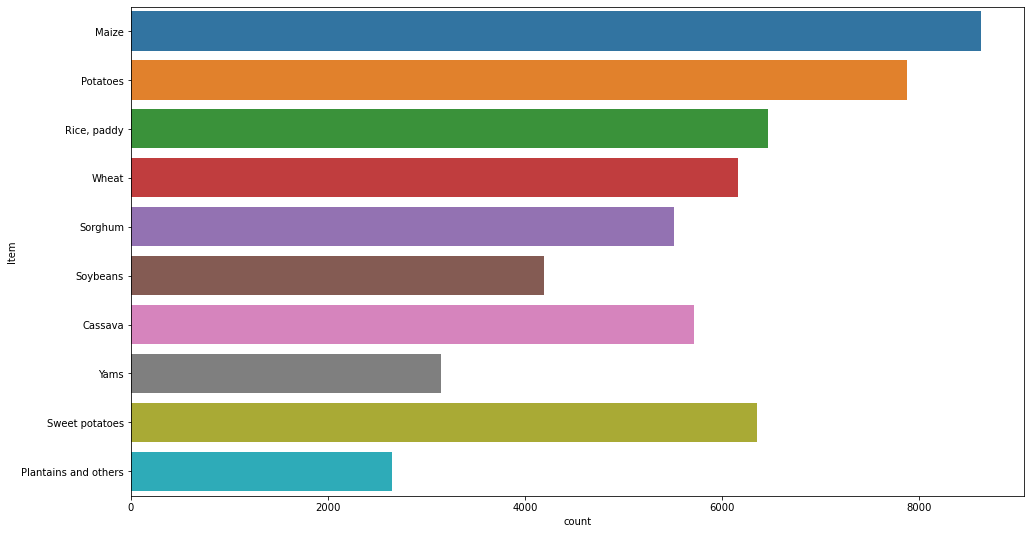

In [13]:
#Visual perception of crops available in the yield dataset with respect to their population
plt.figure(figsize=(16,9))
sns.countplot(y='Item', data= yield_df)
plt.show()

In [14]:
#Count of the countries in the dataset
print(yield_df.Area.value_counts())

Nigeria                               560
Democratic Republic of the Congo      560
United Republic of Tanzania           560
Venezuela (Bolivarian Republic of)    532
Cameroon                              528
                                     ... 
Estonia                                50
Djibouti                               36
Sudan                                  35
Montenegro                             33
South Sudan                            20
Name: Area, Length: 212, dtype: int64


In [15]:
#Total countries in the yield dataset.
yield_df['Area'].nunique()

212

In [16]:
#Checking for Null values
yield_df.isnull().sum()

Area         0
Item         0
Year         0
Cropyield    0
dtype: int64

In [17]:
#Checking for zeros
yield_df.isin([0]).sum()

Area         0
Item         0
Year         0
Cropyield    8
dtype: int64

<AxesSubplot:xlabel='Cropyield', ylabel='Density'>

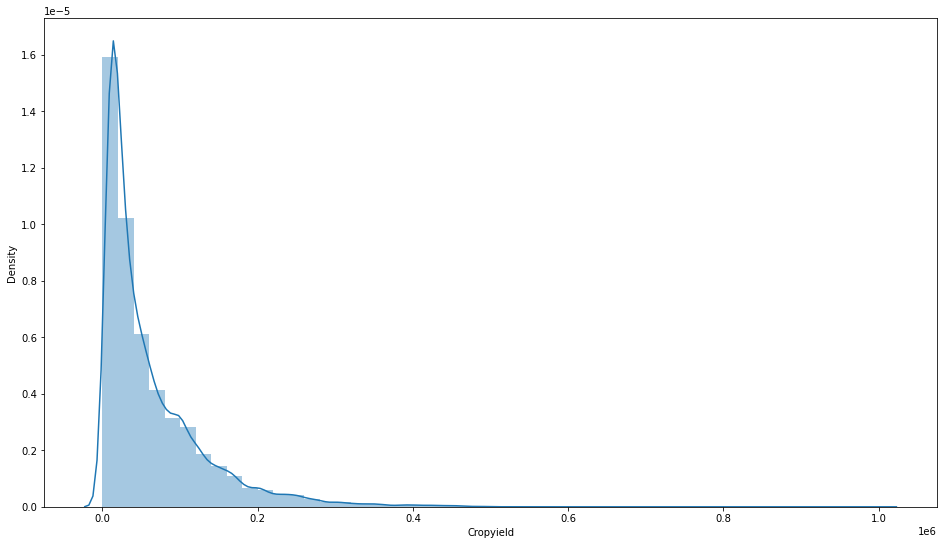

In [18]:
#Distribution plot of Crop yield
plt.figure(figsize=(16,9))
sns.distplot(yield_df.Cropyield)

In [19]:
#Remove zero values
yield_df = yield_df[yield_df.Cropyield != 0]
yield_df.isin([0]).sum()

Area         0
Item         0
Year         0
Cropyield    0
dtype: int64

In [20]:
yield_df.shape

(56709, 4)

# Import Rainfall dataset

In [21]:
rain_df = pd.read_csv('C:/Users/adebi/Downloads/ICA DATA/rainfall.csv')
rain_df.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [22]:
#the last few rows
rain_df.tail()

,Area,Year,average_rain_fall_mm_per_year
6722,Zimbabwe,2013,657
6723,Zimbabwe,2014,657
6724,Zimbabwe,2015,657
6725,Zimbabwe,2016,657
6726,Zimbabwe,2017,657


In [23]:
#Overview of the rainfall data, in terms of rows and columns
rain_df.shape

(6727, 3)

In [24]:
#Data type within the rainfall dataset
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [25]:
#Convert average rainfall yearly to numeric value.
rain_df['average_rain_fall_mm_per_year'] = pd.to_numeric(rain_df['average_rain_fall_mm_per_year'],errors = 'coerce')
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Area                          6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [26]:
#Average rainfall was converted to float due to presence of Null values, Convert average rainfall to int64, whilst filling nullvalues as 0
rain_df['average_rain_fall_mm_per_year'] = rain_df['average_rain_fall_mm_per_year'].fillna(0).astype(np.int64)

In [25]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  6727 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 157.8+ KB


In [27]:
#rename Avg_rain_fall column.

rain_df = rain_df.rename(index=str, columns={'average_rain_fall_mm_per_year':'avg_rain_yrly'})
rain_df.head()

,Area,Year,avg_rain_yrly
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [28]:
#rename Area column

rain_df = rain_df.rename(index=str, columns={' Area': 'Area'})

In [29]:
#Total number of countries in the rainfall dataset
rain_df['Area'].nunique()

217

In [30]:
#Check for null values
rain_df.isnull().sum()

Area             0
Year             0
avg_rain_yrly    0
dtype: int64

In [31]:
#Check for zero values within the rainfall dataset
rain_df.isin([0]).sum()

Area               0
Year               0
avg_rain_yrly    780
dtype: int64

<AxesSubplot:xlabel='avg_rain_yrly', ylabel='Density'>

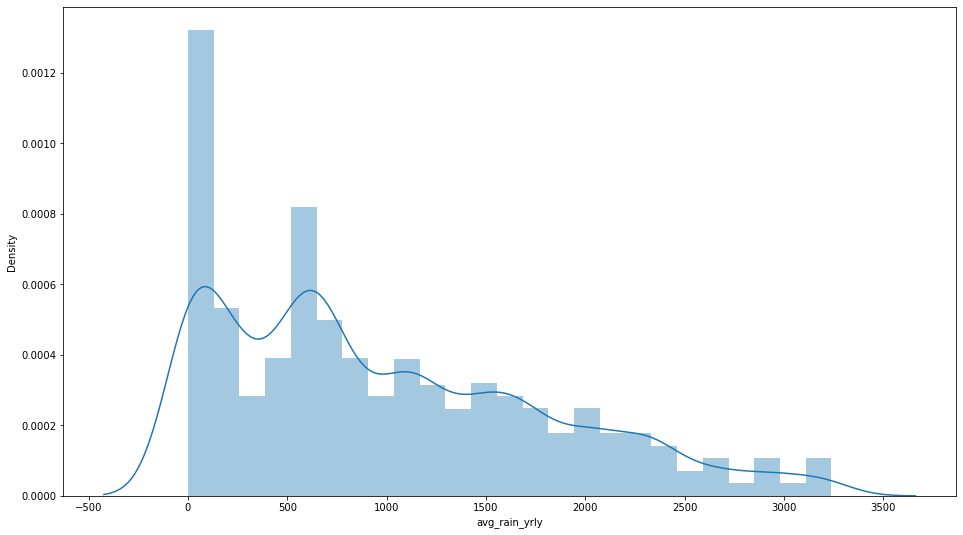

In [32]:
plt.figure(figsize=(16,9))
sns.distplot(rain_df.avg_rain_yrly)

In [33]:
#drop zero values in the rainfall data.
rain_df = rain_df[rain_df.avg_rain_yrly != 0]

In [34]:
rain_df.isin([0]).sum()

Area             0
Year             0
avg_rain_yrly    0
dtype: int64

In [35]:
rain_df.shape

(5947, 3)

In [36]:
rain_df.describe()

,Year,avg_rain_yrly
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


# Merge crop yield dataset with rainfall dataset using both the area and year columns.

In [37]:
crop_df1 = pd.merge(yield_df, rain_df, on = ['Year', 'Area'])

In [38]:
crop_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25385 entries, 0 to 25384
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Area           25385 non-null  object
 1   Item           25385 non-null  object
 2   Year           25385 non-null  int64 
 3   Cropyield      25385 non-null  int64 
 4   avg_rain_yrly  25385 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ MB


In [39]:
crop_df1.head()

,Area,Item,Year,Cropyield,avg_rain_yrly
0,Afghanistan,Maize,1985,16652,327
1,Afghanistan,Potatoes,1985,140909,327
2,Afghanistan,"Rice, paddy",1985,22482,327
3,Afghanistan,Wheat,1985,12277,327
4,Afghanistan,Maize,1986,16875,327


In [40]:
crop_df1.tail()

,Area,Item,Year,Cropyield,avg_rain_yrly
25380,Zimbabwe,"Rice, paddy",2016,22828,657
25381,Zimbabwe,Sorghum,2016,2688,657
25382,Zimbabwe,Soybeans,2016,12727,657
25383,Zimbabwe,Sweet potatoes,2016,22212,657
25384,Zimbabwe,Wheat,2016,18294,657


In [41]:
crop_df1.describe()

,Year,Cropyield,avg_rain_yrly
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


In [42]:
#Check for Null and zero values.
crop_df1.isnull().sum()

Area             0
Item             0
Year             0
Cropyield        0
avg_rain_yrly    0
dtype: int64

In [43]:
crop_df1.isin([0]).sum()

Area             0
Item             0
Year             0
Cropyield        0
avg_rain_yrly    0
dtype: int64

# Import Pesticide Dataset

In [44]:
pest_df = pd.read_csv('C:/Users/adebi/Downloads/ICA DATA/pesticides.csv')
pest_df.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [45]:
#Rename Value column to Pesticides_tonnes
pest_df = pest_df.rename(index = str, columns = {'Value': 'Pesticides_tonnes'})
pest_df.head()

,Domain,Area,Element,Item,Year,Unit,Pesticides_tonnes
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [46]:
#Check last few columns
pest_df.tail()

,Domain,Area,Element,Item,Year,Unit,Pesticides_tonnes
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07
4348,Pesticides Use,Zimbabwe,Use,Pesticides (total),2016,tonnes of active ingredients,2185.07


In [47]:
#Drop irrelevant columns
pest_df = pest_df.drop(['Domain','Element','Item', 'Unit'], axis=1)
pest_df.head()

,Area,Year,Pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [48]:
#Countries in the pest dataset
pest_df['Area'].nunique()

168

In [49]:
pest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   Pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [50]:
pest_df.describe()

,Year,Pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [51]:
#Check for null values
pest_df.isnull().sum()

Area                 0
Year                 0
Pesticides_tonnes    0
dtype: int64

In [52]:
#Check for zeros in the pesticide data set
pest_df.isin([0]).sum()

Area                 0
Year                 0
Pesticides_tonnes    2
dtype: int64

<AxesSubplot:xlabel='Pesticides_tonnes', ylabel='Density'>

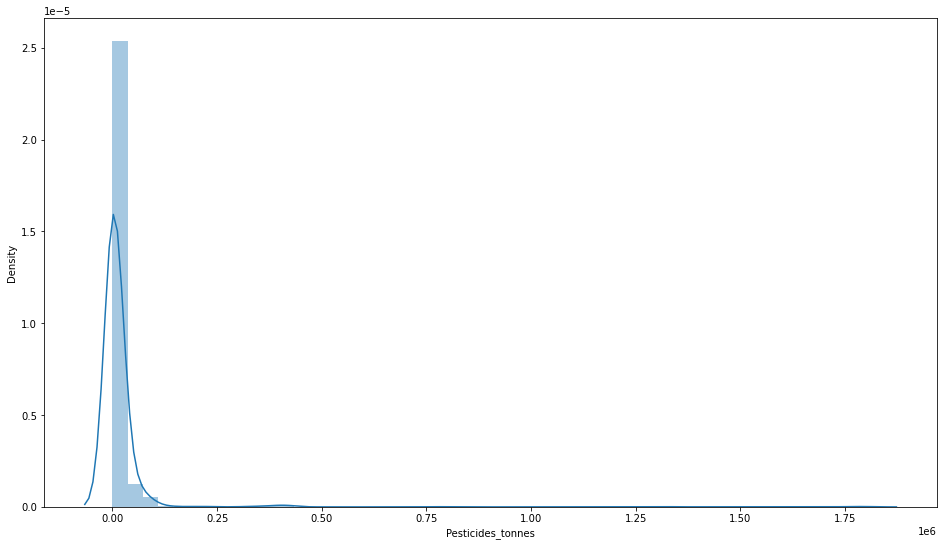

In [53]:
#Distribution plot for the Pesticides
plt.figure(figsize=(16,9))
sns.distplot(pest_df.Pesticides_tonnes)

In [54]:
#drop zero values in the pesticide data.
pest_df = pest_df[pest_df.Pesticides_tonnes != 0]

In [55]:
pest_df.isin([0]).sum()

Area                 0
Year                 0
Pesticides_tonnes    0
dtype: int64

# Merge pesticide data set to the crop data set using the Year and Area columns

In [55]:
crop_df1 = pd.merge(crop_df1, pest_df, on=['Year','Area'])
crop_df1.shape

(18945, 6)

In [56]:
crop_df1.describe()

,Year,Cropyield,avg_rain_yrly,Pesticides_tonnes
count,18945.000000,18945.000000,18945.000000,18945.000000
mean,2003.217947,71846.822169,1204.754605,12758.428445
std,7.895462,79684.211139,784.661370,33008.695654
min,1990.000000,50.000000,51.000000,0.030000
25%,1996.000000,18003.000000,600.000000,154.270000
50%,2004.000000,39589.000000,1113.000000,1578.000000
75%,2010.000000,99214.000000,1705.000000,9830.720000
max,2016.000000,554855.000000,3240.000000,395646.000000


In [57]:
crop_df1.head()

,Area,Item,Year,Cropyield,avg_rain_yrly,Pesticides_tonnes
0,Albania,Maize,1990,36613,1485,121.0
1,Albania,Potatoes,1990,66667,1485,121.0
2,Albania,"Rice, paddy",1990,23333,1485,121.0
3,Albania,Sorghum,1990,12500,1485,121.0
4,Albania,Soybeans,1990,7000,1485,121.0


In [58]:
crop_df1.tail()

,Area,Item,Year,Cropyield,avg_rain_yrly,Pesticides_tonnes
18940,Zimbabwe,"Rice, paddy",2016,22828,657,2185.07
18941,Zimbabwe,Sorghum,2016,2688,657,2185.07
18942,Zimbabwe,Soybeans,2016,12727,657,2185.07
18943,Zimbabwe,Sweet potatoes,2016,22212,657,2185.07
18944,Zimbabwe,Wheat,2016,18294,657,2185.07


In [59]:
#Total number of countries in merged dataset so far
crop_df1['Area'].nunique()

134

In [60]:
#Check for null values
crop_df1.isnull().sum()

Area                 0
Item                 0
Year                 0
Cropyield            0
avg_rain_yrly        0
Pesticides_tonnes    0
dtype: int64

In [61]:
crop_df1.isin([0]).sum()

Area                 0
Item                 0
Year                 0
Cropyield            0
avg_rain_yrly        0
Pesticides_tonnes    0
dtype: int64

# Import Avg Temperature data set

In [62]:
temp_df = pd.read_csv('C:/Users/adebi/Downloads/ICA DATA/temp.csv')
temp_df.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [63]:
temp_df.tail()

,year,country,avg_temp
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52
71310,2013,Mexico,22.19


In [64]:
#rename country column to Area for ease of merging.
temp_df = temp_df.rename(index=str, columns={'country':'Area', 'year':'Year'})
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      71311 non-null  int64  
 1   Area      71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [65]:
temp_df.describe()

,Year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


In [66]:
#Check for Null values
temp_df.isnull().sum()

Year           0
Area           0
avg_temp    2547
dtype: int64

<AxesSubplot:xlabel='avg_temp', ylabel='Density'>

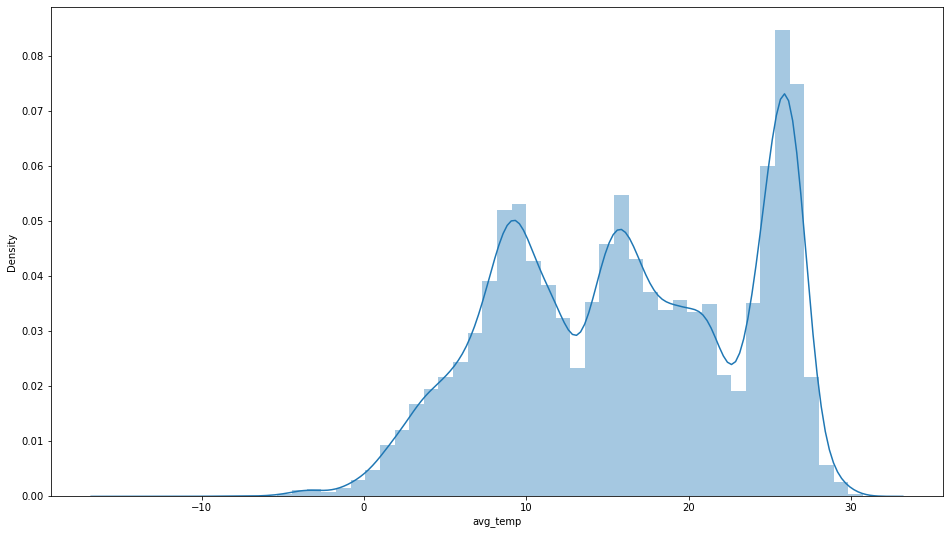

In [67]:
#Distribution plot for the Average Temperature
plt.figure(figsize=(16,9))
sns.distplot(temp_df.avg_temp)

In [68]:
#Drop null values
temp_df = temp_df.dropna()
temp_df.describe()

,Year,avg_temp
count,68764.000000,68764.000000
mean,1908.742423,16.183876
std,66.060692,7.592960
min,1743.000000,-14.350000
25%,1862.000000,9.750000
50%,1914.000000,16.140000
75%,1964.000000,23.762500
max,2013.000000,30.730000


In [69]:
#Check for columns with zero in them
temp_df.isin([0]).sum()

Year        0
Area        0
avg_temp    2
dtype: int64

In [70]:
#drop zero values in the temp data.
temp_df = temp_df[temp_df.avg_temp != 0]

In [71]:
temp_df.isin([0]).sum()

Year        0
Area        0
avg_temp    0
dtype: int64

In [72]:
#Number of Areas within the average temperature data set
temp_df['Area'].nunique()

137

# Merge Avg temperature data set with crop data set using Area and Year column

In [73]:
crop_df1 = pd.merge(crop_df1, temp_df, on = ['Area','Year'])
crop_df1.head()

,Area,Item,Year,Cropyield,avg_rain_yrly,Pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [74]:
crop_df1.tail()

,Area,Item,Year,Cropyield,avg_rain_yrly,Pesticides_tonnes,avg_temp
28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76
28241,Zimbabwe,Wheat,2013,22888,657,2550.07,19.76


In [75]:
crop_df1.describe()

,Year,Cropyield,avg_rain_yrly,Pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [76]:
#Number of rows and columns in the final merged dataset.
crop_df1.shape

(28242, 7)

In [77]:
#Check for Null values
crop_df1.isnull().sum()

Area                 0
Item                 0
Year                 0
Cropyield            0
avg_rain_yrly        0
Pesticides_tonnes    0
avg_temp             0
dtype: int64

In [78]:
crop_df1.isnull().sum()

Area                 0
Item                 0
Year                 0
Cropyield            0
avg_rain_yrly        0
Pesticides_tonnes    0
avg_temp             0
dtype: int64

# Merged Dataset Exploration

In [79]:
crop_df1.groupby('Item').count()

,Area,Year,Cropyield,avg_rain_yrly,Pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [80]:
#Number of Areas now covered in the final merged dataset
crop_df1['Area'].nunique()

101

In [81]:
#Number of crops in the final merged dataset
crop_df1['Item'].nunique()

10

In [82]:
#Value count of crops within the final dataset
Crops = crop_df1.Item.value_counts()
print(Crops)

Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: Item, dtype: int64


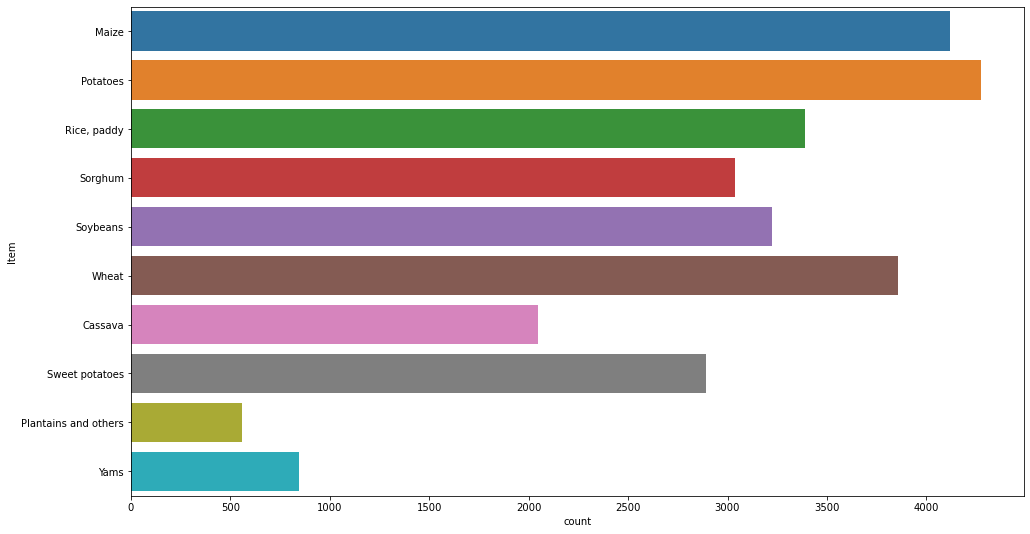

In [84]:
#Visual perception of crops available in the final dataset with respect to their population
plt.figure(figsize=(16,9))
sns.countplot(y='Item', data= crop_df1)
plt.show()

Area
India                 327420324
Brazil                167550306
Mexico                130788528
Japan                 124470912
Australia             109111062
Pakistan               73897434
Indonesia              69193506
United Kingdom         55419990
Turkey                 52263950
Spain                  46773540
South Africa           41333132
Germany                38780463
Egypt                  36828848
Canada                 34706922
Argentina              32864032
Italy                  32280700
Colombia               26927138
Dominican Republic     25312166
Morocco                22173010
Ecuador                21315591
Name: Cropyield, dtype: int64


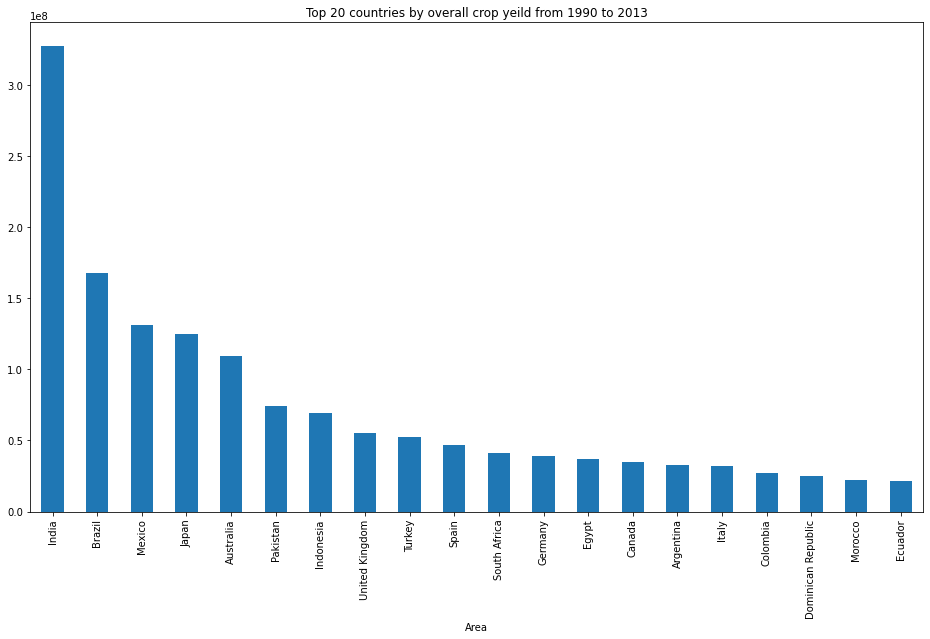

In [85]:
#Top 20 Areas with overall crop yield

top20=crop_df1.groupby(['Area'], sort=True)['Cropyield'].sum().nlargest(20)
print(top20)

top20.T.plot(kind='bar', figsize=(16,9))
plt.title('Top 20 countries by overall crop yeild from 1990 to 2013')
plt.show()

In [86]:
#Focus on India as the country with the highest yield

India = crop_df1.loc[crop_df1['Area'] == 'India']
India.head()

,Area,Item,Year,Cropyield,avg_rain_yrly,Pesticides_tonnes,avg_temp
10502,India,Cassava,1990,205381,1083,75000.0,25.58
10503,India,Cassava,1990,205381,1083,75000.0,26.88
10504,India,Cassava,1990,205381,1083,75000.0,25.79
10505,India,Cassava,1990,205381,1083,75000.0,24.10
10506,India,Cassava,1990,205381,1083,75000.0,25.25


Item
Cassava           142810624
Potatoes           92122514
Sweet potatoes     44439538
Rice, paddy        15329644
Wheat              13432694
Maize               9768792
Soybeans            5239586
Sorghum             4276932
Name: Cropyield, dtype: int64


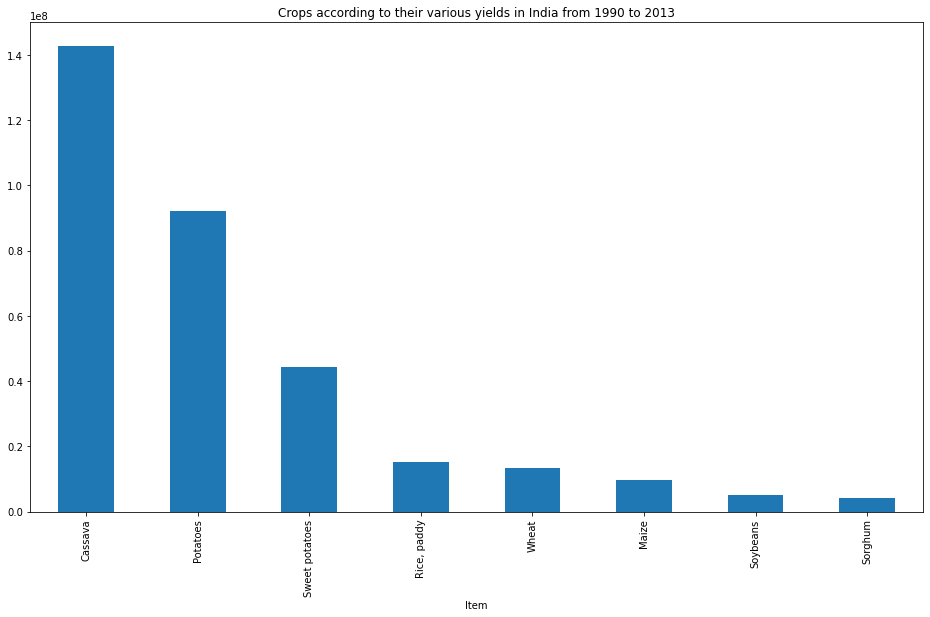

In [87]:
#Crops according to their various yields in India from 1990 to 2013

topIndia=India.groupby(['Item'], sort=True)['Cropyield'].sum().nlargest(10)
print(topIndia)

topIndia.T.plot(kind='bar', figsize=(16,9))
plt.title('Crops according to their various yields in India from 1990 to 2013')
plt.show()

In [88]:
#Focus on Cassava yield in India
IndianCassava = India.loc[India.Item == 'Cassava']
IndianCassava.head()

,Area,Item,Year,Cropyield,avg_rain_yrly,Pesticides_tonnes,avg_temp
10502,India,Cassava,1990,205381,1083,75000.0,25.58
10503,India,Cassava,1990,205381,1083,75000.0,26.88
10504,India,Cassava,1990,205381,1083,75000.0,25.79
10505,India,Cassava,1990,205381,1083,75000.0,24.10
10506,India,Cassava,1990,205381,1083,75000.0,25.25


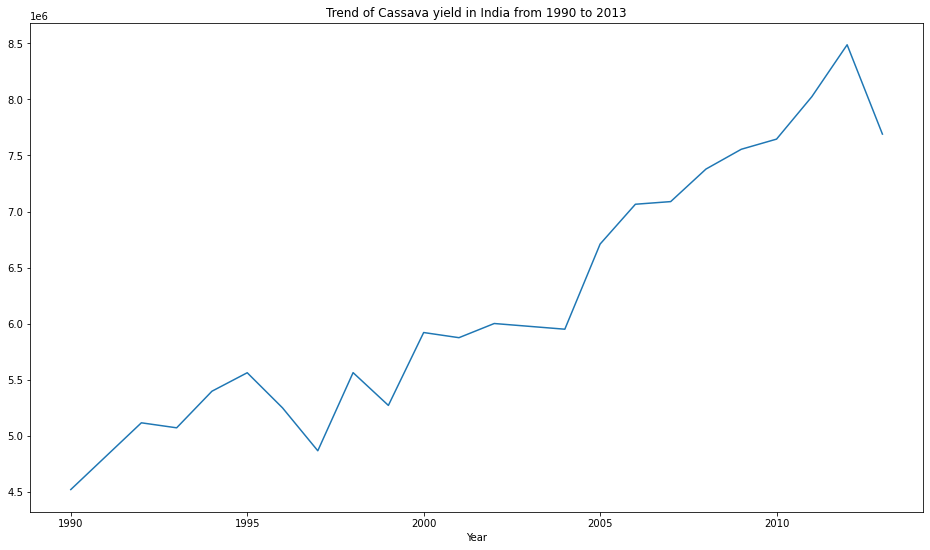

In [89]:
#Trend of Cassava yield in India from 1990 to 2013

Cassavayr = IndianCassava.groupby(['Year'], sort = True)['Cropyield'].sum()
Cassavayr.head()

Cassavayr.T.plot(kind='line', figsize=(16,9))
plt.title('Trend of Cassava yield in India from 1990 to 2013')
plt.show()

Item
Potatoes                854351426
Sweet potatoes          344077024
Cassava                 307730510
Maize                   149633801
Rice, paddy             137994713
Wheat                   116158445
Yams                     96676873
Plantains and others     58958974
Sorghum                  56634127
Soybeans                 53924312
Name: Cropyield, dtype: int64


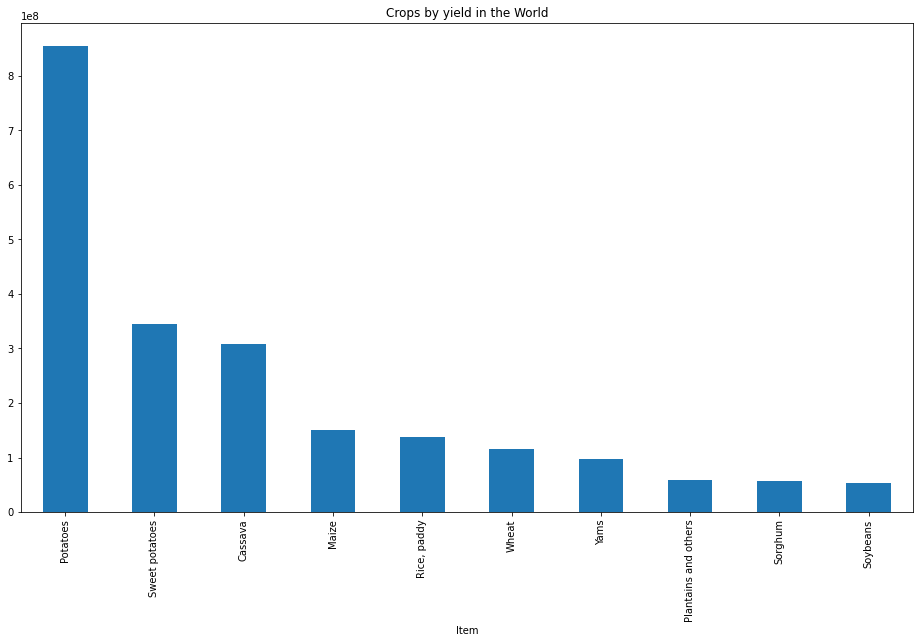

In [90]:
#Items by Crop yields in all countries
topcrops=crop_df1.groupby(['Item'], sort=True)['Cropyield'].sum().nlargest(10)
print(topcrops)

topcrops.T.plot(kind='bar', figsize=(16,9))
plt.title('Crops by yield in the World')
plt.show()

Area
India             92122514
Brazil            49602168
United Kingdom    46705145
Australia         45670386
Japan             42918726
Mexico            42053880
Pakistan          32969754
Turkey            30530955
South Africa      27341980
Germany           26672181
Indonesia         21560562
Spain             17348097
Canada            16954170
Argentina         12054722
Italy             10941622
Egypt             10830468
Saudi Arabia      10273486
New Zealand       10032090
Morocco            9985022
Netherlands        9971625
Name: Cropyield, dtype: int64


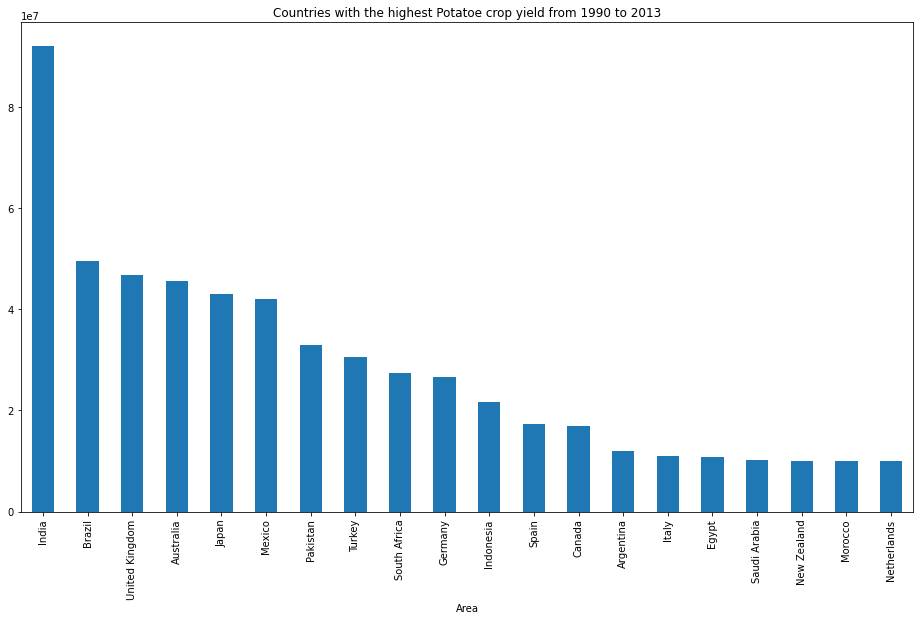

In [91]:
#Countries with the highest Potatoe Crop yield

Potatoes = crop_df1.loc[crop_df1.Item == 'Potatoes']
topPotatoes = Potatoes.groupby(['Area'], sort=True)['Cropyield'].sum().nlargest(20)
print(topPotatoes)

topPotatoes.T.plot(kind='bar', figsize=(16,9))
plt.title('Countries with the highest Potatoe crop yield from 1990 to 2013')
plt.show()

Area
India          44439538
Mexico         35808592
Australia      35550294
Japan          32794236
Brazil         28266502
Pakistan       21687615
Indonesia      14515008
Egypt          12022990
Spain          11836725
Italy           8458894
Morocco         7806430
Argentina       6879904
Bangladesh      4358032
Greece          4325831
Senegal         3844977
Peru            3775661
New Zealand     3731327
Jamaica         3625552
Chile           3433134
Niger           3424561
Name: Cropyield, dtype: int64


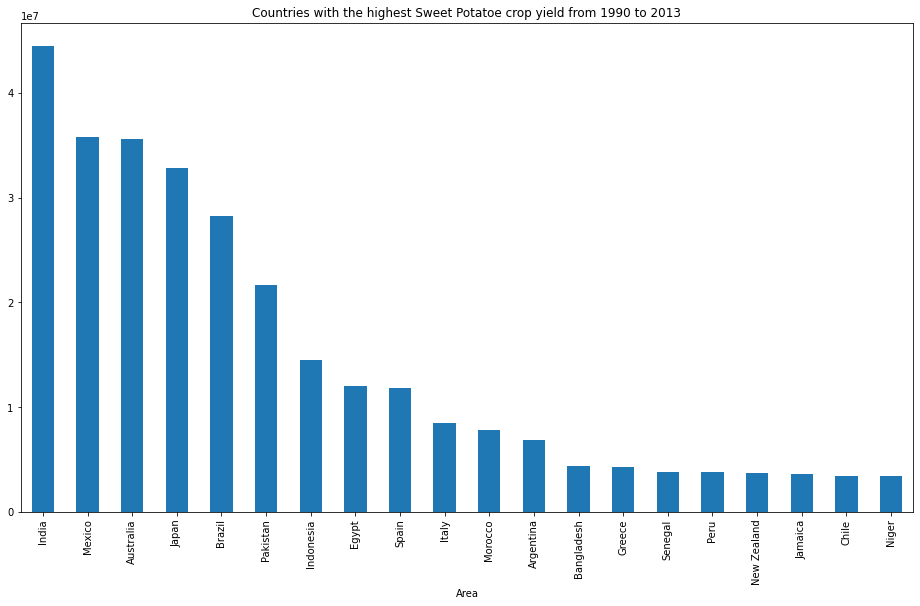

In [92]:
#Countries with the highest Sweet Potatoe Crop yield

S_Potatoes = crop_df1.loc[crop_df1.Item == 'Sweet potatoes']
topS_Potatoes = S_Potatoes.groupby(['Area'], sort=True)['Cropyield'].sum().nlargest(20)
print(topS_Potatoes)

topS_Potatoes.T.plot(kind='bar', figsize=(16,9))
plt.title('Countries with the highest Sweet Potatoe crop yield from 1990 to 2013')
plt.show()

Area
India                 142810624
Brazil                 33671231
Mexico                 21610424
Indonesia              20686458
Colombia                4632366
Argentina               4604308
Suriname                4399497
Jamaica                 4172058
Thailand                4003240
Niger                   3553448
Malaysia                3530075
Mauritius               3316990
El Salvador             3243092
Dominican Republic      3152294
Ghana                   2925019
Cameroon                2829320
Mali                    2785346
Malawi                  2782292
Ecuador                 2719566
Bahamas                 2586131
Name: Cropyield, dtype: int64


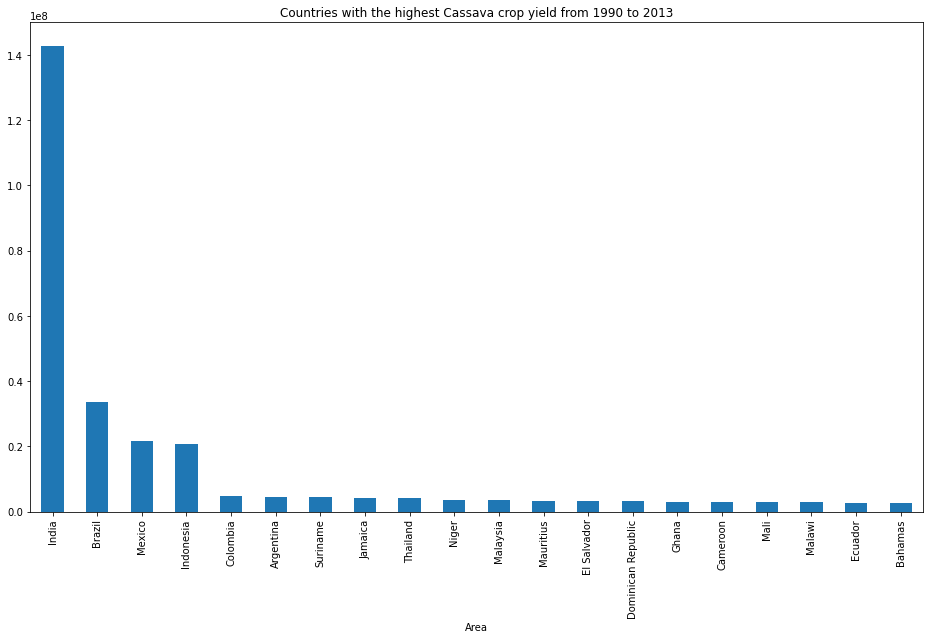

In [93]:
#Countries with the highest Cassava Crop yield

Cassava = crop_df1.loc[crop_df1.Item == 'Cassava']
topCassava = Cassava.groupby(['Area'], sort=True)['Cropyield'].sum().nlargest(20)
print(topCassava)

topCassava.T.plot(kind='bar', figsize=(16,9))
plt.title('Countries with the highest Cassava crop yield from 1990 to 2013')
plt.show()

In [80]:
crop_df1.groupby(['Item','Area'],sort=True)['Cropyield'].sum().nlargest(20)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Cassava         Brazil             33671231
Potatoes        Pakistan           32969754
Sweet potatoes  Japan              32794236
Potatoes        Turkey             30530955
Yams            Japan              29165394
Sweet potatoes  Brazil             28266502
Potatoes        South Africa       27341980
                Germany            26672181
Yams            Brazil             23472053
Sweet potatoes  Pakistan           21687615
Name: Cropyield, dtype: int64

In [94]:
#Correlation
print(crop_df1.corr())

                       Year  Cropyield  avg_rain_yrly  Pesticides_tonnes  \
Year               1.000000   0.091630      -0.003798           0.140930   
Cropyield          0.091630   1.000000       0.000962           0.064085   
avg_rain_yrly     -0.003798   0.000962       1.000000           0.180984   
Pesticides_tonnes  0.140930   0.064085       0.180984           1.000000   
avg_temp           0.014409  -0.114777       0.313040           0.030946   

                   avg_temp  
Year               0.014409  
Cropyield         -0.114777  
avg_rain_yrly      0.313040  
Pesticides_tonnes  0.030946  
avg_temp           1.000000  


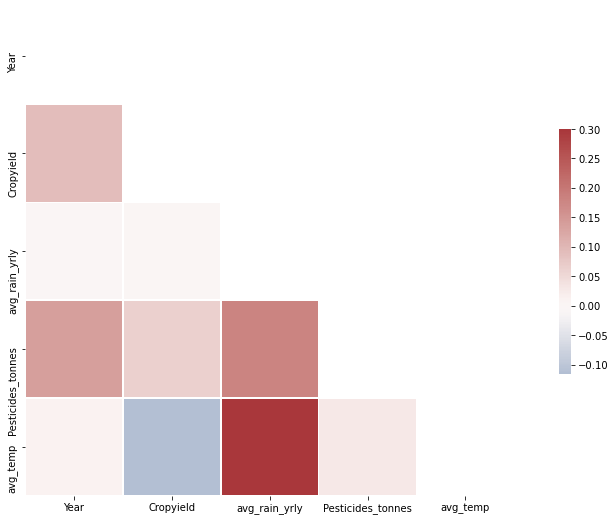

In [95]:
#Correlation using Heatmap.
correlation_data=crop_df1.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 9))


cmap = sns.palette="vlag"


sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

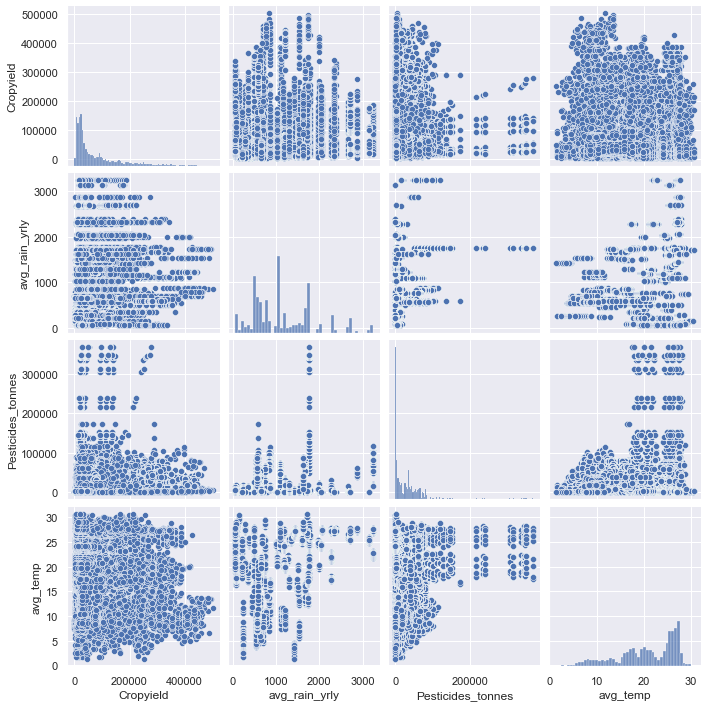

In [96]:
#Correlation using scatterplot
to_plot = ["Cropyield", "avg_rain_yrly", "Pesticides_tonnes", "avg_temp"]
sns.set_theme()
sns.pairplot(crop_df1[to_plot])

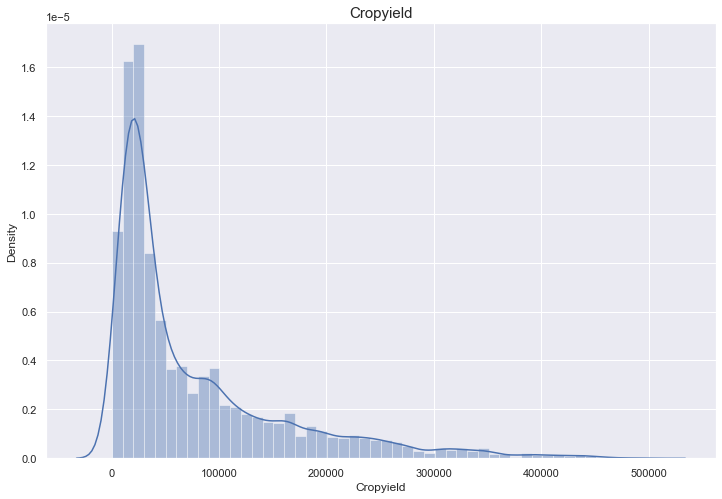

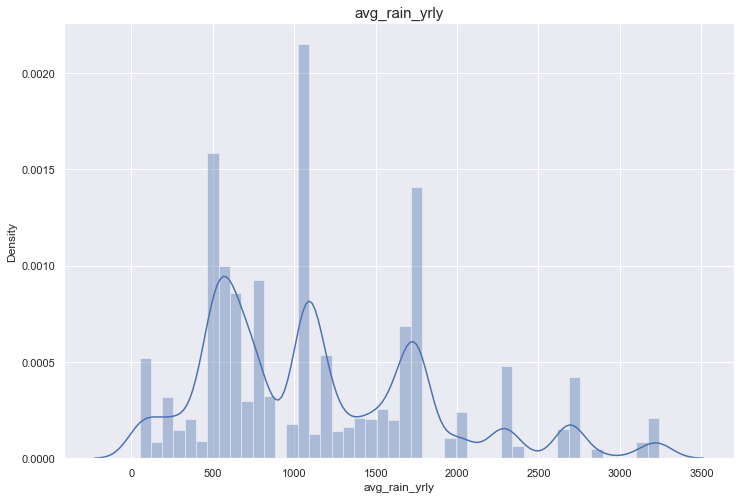

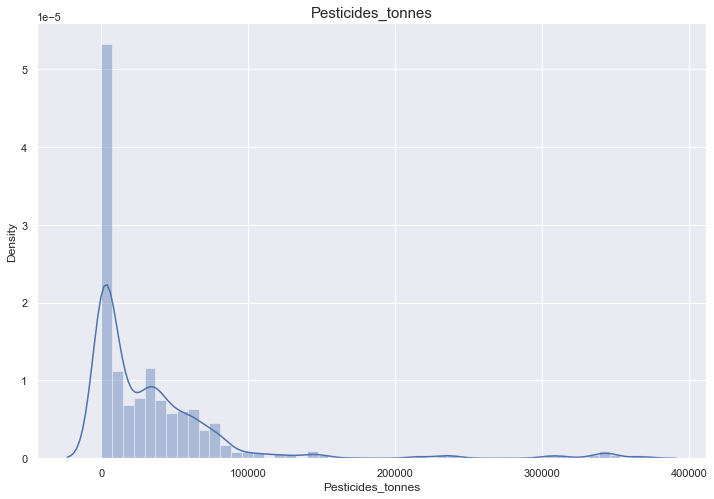

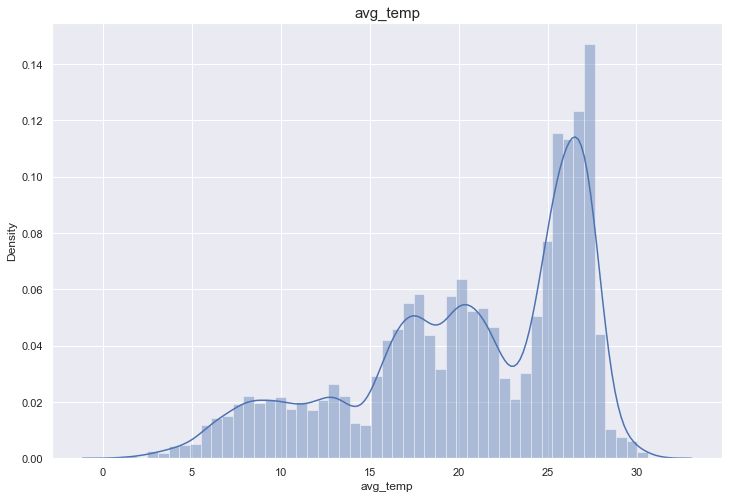

In [97]:
#Density plot of all variables

for variables in to_plot:
    plt.figure(figsize=(12, 8))
    sns.distplot(crop_df1[variables])
    plt.title(f"{variables}", size=15)
    plt.show()

In [98]:
#Check for categorical variables within the merged dataset
crop_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               28242 non-null  object 
 1   Item               28242 non-null  object 
 2   Year               28242 non-null  int64  
 3   Cropyield          28242 non-null  int64  
 4   avg_rain_yrly      28242 non-null  int64  
 5   Pesticides_tonnes  28242 non-null  float64
 6   avg_temp           28242 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.7+ MB


In [101]:
crop_df1.head()

,Area,Item,Year,Cropyield,avg_rain_yrly,Pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


# Encode Categorical Variable

In [102]:
#Encode categorical variables in the dataset i.e Area and Item. This is to ensure that they can play a part in the algorithms to be utilised
crop_df1_dummies = pd.get_dummies(crop_df1, columns = ['Area',"Item"], prefix = ['Country',"Item"])
crop_df1_dummies.head()

,Year,Cropyield,avg_rain_yrly,Pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,36613,1485,121.0,16.37,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,66667,1485,121.0,16.37,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,23333,1485,121.0,16.37,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,12500,1485,121.0,16.37,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,7000,1485,121.0,16.37,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [103]:
crop_df1_dummies.shape

(28242, 116)

In [104]:
#check to ensure that original ITEM and AREA column has been dropped.
print('Item' in crop_df1_dummies)
print('Country' in crop_df1_dummies)
print('Area' in crop_df1_dummies)

False
False
False


## Define features and target column

In [105]:
features=crop_df1_dummies.loc[:, crop_df1_dummies.columns != 'Cropyield']
target=crop_df1['Cropyield']
features.head()

,Year,avg_rain_yrly,Pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [106]:
target.head()

0    36613
1    66667
2    23333
3    12500
4     7000
Name: Cropyield, dtype: int64

In [107]:
print('Cropyield' in features)

False


In [108]:
#drop Year column
features = features.drop(['Year'], axis=1)

In [109]:
if 'Year' in features.columns :
    print('present')
    
else:
    print('absent')

absent


In [110]:
#Overview of features data (number of rows and columns)
features.shape

(28242, 114)

In [111]:
features.describe()

,avg_rain_yrly,Pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
count,28242.00000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,...,28242.00000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000
mean,1149.05598,37076.909344,20.542627,0.003505,0.004037,0.005807,0.013030,0.002231,0.034204,0.003399,...,0.07241,0.145917,0.019687,0.151406,0.119963,0.107606,0.114121,0.102330,0.136570,0.029991
std,709.81215,59958.784665,6.312051,0.059104,0.063407,0.075983,0.113406,0.047179,0.181757,0.058204,...,0.25917,0.353030,0.138925,0.358450,0.324924,0.309887,0.317964,0.303087,0.343399,0.170565
min,51.00000,0.040000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,593.00000,1702.000000,16.702500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1083.00000,17529.440000,21.510000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1668.00000,48687.880000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3240.00000,367778.000000,30.650000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
#Check for nan values in features
features.isnull().values.any()

False

In [113]:
#Check for nan values in target column
target.isnull().values.any()

False

# Feature Scaling to bring all Feature variables to the reasonable level of magnitude.

In [114]:
#Create a seperate Dataframe for numerical variable within the features dataset
f = features[['avg_rain_yrly', 'Pesticides_tonnes', 'avg_temp']]

In [115]:
#Scale Numerical variables alone
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(f)
scaled = scaler.fit_transform(f)
scaled_f = pd.DataFrame(scaled, columns=f.columns)

In [116]:
scaled_f.head()

,avg_rain_yrly,Pesticides_tonnes,avg_temp
0,0.449671,0.000329,0.513458
1,0.449671,0.000329,0.513458
2,0.449671,0.000329,0.513458
3,0.449671,0.000329,0.513458
4,0.449671,0.000329,0.513458


In [117]:
#Now drop the Numerical variables from the features dataset
features = features.drop(['avg_rain_yrly', 'Pesticides_tonnes', 'avg_temp'], axis = 1)

In [118]:
features.head()

,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [119]:
#Join the scaled numerical variable to the encoded categorical variable
scaled_f.join(features)

,avg_rain_yrly,Pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.449671,0.000329,0.513458,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.449671,0.000329,0.513458,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.449671,0.000329,0.513458,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.449671,0.000329,0.513458,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.449671,0.000329,0.513458,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,0.190028,0.006934,0.628961,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
28238,0.190028,0.006934,0.628961,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
28239,0.190028,0.006934,0.628961,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
28240,0.190028,0.006934,0.628961,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [120]:
#This becomes the scaled featueres dataframe
scaled_features=scaled_f.join(features)
scaled_features.head()

,avg_rain_yrly,Pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.449671,0.000329,0.513458,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.449671,0.000329,0.513458,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.449671,0.000329,0.513458,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.449671,0.000329,0.513458,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.449671,0.000329,0.513458,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [121]:
scaled_features.describe()

,avg_rain_yrly,Pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
count,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,...,28242.00000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000
mean,0.344326,0.100813,0.655626,0.003505,0.004037,0.005807,0.013030,0.002231,0.034204,0.003399,...,0.07241,0.145917,0.019687,0.151406,0.119963,0.107606,0.114121,0.102330,0.136570,0.029991
std,0.222581,0.163030,0.215061,0.059104,0.063407,0.075983,0.113406,0.047179,0.181757,0.058204,...,0.25917,0.353030,0.138925,0.358450,0.324924,0.309887,0.317964,0.303087,0.343399,0.170565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.169959,0.004628,0.524787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.323612,0.047663,0.688586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.507056,0.132384,0.841567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train-Test Split

In [122]:
#setting values for x and y

X = scaled_features
y = target

In [123]:
#Splitting the dataset

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [124]:
X_train.shape

(19769, 114)

In [125]:
X_test.shape

(8473, 114)

In [126]:
# Seeing the split across training and testing datasets

print('Number of records in the original dataset: ', len(y))
print('Number of records in the training dataset: ', len(y_train))
print('Number of records in the testing dataset: ', len(y_test))

Number of records in the original dataset:  28242
Number of records in the training dataset:  19769
Number of records in the testing dataset:  8473


# Define Evaluation functions

In [127]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

# Machine Learning Algorithms

In [128]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

# Linear Regression model

In [129]:

from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(X_train, y_train)

predictions = ml.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ml)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 29669.934615838545
MSE: 1825684748.9474802
RMSE: 42728.03235520541
R2 Score: 0.7481024217009651
------------------------------
RMSE Cross-Validation: 4.570647348223094e+17


# Support Vector Regressor

In [130]:
from sklearn.svm import SVR
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 9432.510402406353
MSE: 414624466.13428867
RMSE: 20362.329585150335
R2 Score: 0.9427924788313155
------------------------------
RMSE Cross-Validation: 46876.70516648989


# Random Forest Regressor

In [131]:
#Creating the best number of estimators for the model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200, 300, 1000]}

In [132]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
grid_search = GridSearchCV(estimator = random_forest , param_grid = param_grid, cv = 3, n_jobs = -1)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 5695.680840565331
MSE: 188728558.23802653
RMSE: 13737.851296255412
R2 Score: 0.9739603089726008
------------------------------
RMSE Cross-Validation: 44505.42949690565


# XGBoost Regressor

In [133]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=200, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 20003.631860256475
MSE: 979435691.1411738
RMSE: 31295.93729449837
R2 Score: 0.8648630444876436
------------------------------
RMSE Cross-Validation: 48090.181051494495


# K-NN

In [134]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [135]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()
grid = GridSearchCV(estimator = knn, param_grid = param_grid, cv=10, scoring='accuracy')
knn.fit(X_train, y_train) 
predictions = knn.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(knn)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "KNN","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 8284.29628230851
MSE: 311855955.8063779
RMSE: 17659.443813619328
R2 Score: 0.9569718922771057
------------------------------
RMSE Cross-Validation: 51729.147229005895


# Results and Model Comparison

In [142]:
models.sort_values(by="RMSE", ignore_index = True)

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,RandomForestRegressor,5695.680841,1.887286e+08,13737.851296,0.973960,4.450543e+04
1,KNN,8284.296282,3.118560e+08,17659.443814,0.956972,5.172915e+04
2,SVR,9432.510402,4.146245e+08,20362.329585,0.942792,4.687671e+04
3,XGBRegressor,20003.631860,9.794357e+08,31295.937294,0.864863,4.809018e+04
4,LinearRegression,29669.934616,1.825685e+09,42728.032355,0.748102,4.570647e+17
